In [11]:
import pandas as pd
import glob
import seaborn as sns

# Research Question

How does combine performance affect the draft stock of an NFL athlete?

# Hypothesis

The better that NFL draftee's combine performance will cause them to be drafted higher in relation to other players of the same position. 

# Data Preprocessing

To identify this problem two different data sets were used. The first data set was used to highlight the combine performance of players. This data set highlighted metrics such as their 40 yard dash time, height, weight, vertical, bench press, 3 cone drill time, shuttle cone drill time. This includes combine performances for every single player that attended the combine from the years 2000 - 2022. 

The second data set was used to identify the player's draft position. This was not stated in the original data set, so by combining the two data sets together we are able to create a data set that has all combine metrics as well as draft position. 



In [133]:
csv_files = glob.glob('./combine-data/*.csv')
draft_df = pd.read_csv('./draft-data/nfl_draft_prospects.csv')
comb_df = pd.DataFrame()

for file in csv_files:
    df = pd.read_csv(file)
    comb_df = pd.concat([comb_df, df])

select_df = draft_df[['draft_year', 'player_name', 'school', 'pick', 'overall', 'round']]
select_df.head()

,draft_year,player_name,school,pick,overall,round
0,1967,Bubba Smith,Michigan State,1.0,1.0,1.0
1,1967,Clinton Jones,Michigan State,2.0,2.0,1.0
2,1967,Steve Spurrier,Florida,3.0,3.0,1.0
3,1967,Bob Griese,Purdue,4.0,4.0,1.0
4,1967,George Webster,Michigan State,5.0,5.0,1.0


In [134]:
merged_df = pd.merge(comb_df, select_df, left_on=['Player', 'School'], right_on=['player_name', 'school'], how='inner')
merged_df = merged_df.drop(['player_name', 'school'], axis=1)

In [135]:
comb_df.head(10)

,Player,Pos,School,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle
0,John Abraham,OLB,South Carolina,6-4,252.0,4.55,NaN,NaN,NaN,NaN,NaN
1,Shaun Alexander,RB,Alabama,6-0,218.0,4.58,NaN,NaN,NaN,NaN,NaN
2,Darnell Alford,OT,Boston Col.,6-4,334.0,5.56,25.0,23.0,94.0,8.48,4.98
3,Kyle Allamon,TE,Texas Tech,6-2,253.0,4.97,29.0,NaN,104.0,7.29,4.49
4,Rashard Anderson,CB,Jackson State,6-2,206.0,4.55,34.0,NaN,123.0,7.18,4.15
5,Jake Arians,K,Ala-Birmingham,5-10,202.0,NaN,NaN,NaN,NaN,NaN,NaN
6,LaVar Arrington,OLB,Penn State,6-3,250.0,4.53,NaN,NaN,NaN,NaN,NaN
7,Corey Atkins,OLB,South Carolina,6-0,237.0,4.72,31.0,21.0,112.0,7.96,4.39
8,Kyle Atteberry,K,Baylor,6-0,167.0,NaN,NaN,NaN,NaN,NaN,NaN
9,Reggie Austin,CB,Wake Forest,5-9,175.0,4.44,35.0,17.0,119.0,7.03,4.14


In [136]:
merged_df.head(10)

,Player,Pos,School,Ht,Wt,40yd,Vertical,Bench,Broad Jump,3Cone,Shuttle,draft_year,pick,overall,round
0,John Abraham,OLB,South Carolina,6-4,252.0,4.55,NaN,NaN,NaN,NaN,NaN,2000,13.0,13.0,1.0
1,Shaun Alexander,RB,Alabama,6-0,218.0,4.58,NaN,NaN,NaN,NaN,NaN,2000,19.0,19.0,1.0
2,Rashard Anderson,CB,Jackson State,6-2,206.0,4.55,34.0,NaN,123.0,7.18,4.15,2000,23.0,23.0,1.0
3,LaVar Arrington,OLB,Penn State,6-3,250.0,4.53,NaN,NaN,NaN,NaN,NaN,2000,2.0,2.0,1.0
4,Reggie Austin,CB,Wake Forest,5-9,175.0,4.44,35.0,17.0,119.0,7.03,4.14,2000,31.0,125.0,4.0
5,Mark Baniewicz,OT,Syracuse,6-6,312.0,5.34,28.0,20.0,96.0,7.72,4.73,2000,41.0,247.0,7.0
6,Rashidi Barnes,S,Colorado,6-0,208.0,4.62,35.0,10.0,114.0,6.92,4.32,2000,19.0,225.0,7.0
7,David Barrett,CB,Arkansas,5-10,199.0,4.44,37.5,16.0,116.0,6.81,4.04,2000,8.0,102.0,4.0
8,William Bartee,CB,Oklahoma,6-1,192.0,4.43,38.5,NaN,124.0,6.70,3.99,2000,23.0,54.0,2.0
9,Robert Bean,CB,Mississippi State,5-11,178.0,4.50,34.5,NaN,122.0,6.87,4.20,2000,4.0,133.0,5.0


## Handling Missing Values

Missing values are something that is a little tricky with this dataset. There are a lot of missing values, but it is not as easy as filling them in or dropping the ones that have missing data. There is supposed to be missing values, that is because some positions don't do certain drills. For instance quarterbacks do not participate in the bench press drill. So this is going to have to be very position specific. 

In [137]:
def convert_height(height):
    '''
    This method converts the parameter height into two decimal places. This is neccesary because the given value is of type string and a numerical representation for it is needed.
    :param height: 
    :return: 
    '''
    if height:
        feet = int(str(height)[0:1])
        inches_str = str(height)[2:]
        if inches_str:  
            inches = int(inches_str)
            return str(feet + round(inches / 12, 2))
    return None

merged_df = merged_df.dropna(subset=['Ht'])
merged_df['Ht'] = merged_df.Ht.apply(lambda x: convert_height(x))

In [9]:
# All the positions possible
positions = ['CB', 'OT', 'S', 'OG', 'ILB', 'DE', 'RB', 'FB', 'TE', 'OLB', 'DT',
       'C', 'WR', 'QB', 'LS', 'EDGE', 'LB', 'OL', 'DL', 'DB']

# Visualizing the Data

### 40-Yard Dash

<Axes: xlabel='overall', ylabel='Bench'>

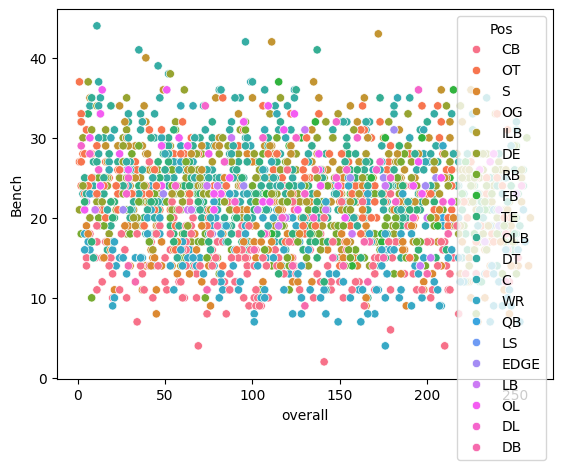

In [18]:
forty_dash = merged_df.dropna(subset=['40yd'])
sns.scatterplot(data=merged_df, x='overall', y='40yd')

<Axes: xlabel='Pos', ylabel='Vertical'>

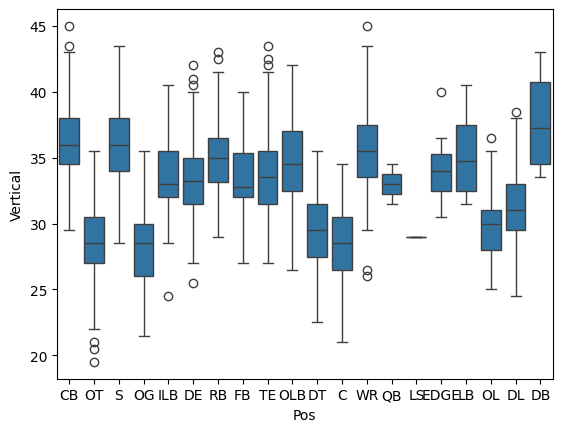

In [14]:
sns.boxplot(data=merged_df, x='Pos', y='Vertical')